In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from datetime import date, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from mpl_toolkits.basemap import Basemap

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('../data/CA-results-join.csv.bz2', low_memory=False)
data.MeasureGroup = data.MeasureGroup.str.strip()
data.describe()

,CountyCode,LatitudeMeasure,LongitudeMeasure,OriginalValue,Value
count,853262.000000,853262.000000,853262.000000,853262.000000,853262.000000
mean,58.753790,37.301915,-120.483105,322.304825,2.458932
std,31.715042,2.326658,2.112235,7057.745064,17.653727
min,1.000000,32.543390,-177.040700,0.000000,0.000000
25%,31.000000,35.112600,-121.960793,0.009000,0.000043
50%,65.000000,37.614700,-121.110493,0.405000,0.010000
75%,87.000000,38.950300,-119.329900,3.490000,0.440000
max,115.000000,42.004600,-114.139443,1000000.000000,1000.000000


In [3]:
data.columns

Index(['MonitoringLocationIdentifier', 'MonitoringLocationTypeName',
       'MonitoringLocationName', 'MonitoringLocationDescriptionText',
       'CountyCode', 'CountyName', 'LatitudeMeasure', 'LongitudeMeasure',
       'ActivityMediaName', 'ActivityMediaSubdivisionName',
       'ActivityStartDate', 'ActivityStartTime/Time',
       'ActivityStartTime/TimeZoneCode', 'ActivityEndDate',
       'ActivityEndTime/Time', 'ActivityEndTime/TimeZoneCode', 'Measure',
       'Limit', 'MeasureGroup', 'OriginalValue', 'OriginalUnit', 'Value',
       'Unit', 'ResultCommentText'],
      dtype='object')

In [4]:
data['Location'] = data.MonitoringLocationIdentifier

In [5]:
data['Date'] = pd.to_datetime(data.ActivityStartDate)
cutoff = date(2010, 1, 1)
cutoff

datetime.date(2010, 1, 1)

In [6]:
timerange = data.loc[data.Date >= cutoff]
len(timerange)

155652

In [7]:
len(timerange.MeasureGroup.unique())

62

In [8]:
means = timerange[['MonitoringLocationIdentifier', 'MeasureGroup', 'Value']]
means.columns = ['Location', 'MeasureGroup', 'Value']

means = means.groupby(['Location', 'MeasureGroup']) \
    .mean() \
    .reset_index()
    
means.head(10)

,Location,MeasureGroup,Value
0,11NPSWRD_WQX-PORE_319_EU-L,nitrate,0.268571
1,11NPSWRD_WQX-PORE_319_EU-U,nitrate,0.185000
2,11NPSWRD_WQX-PORE_319_HN-L,nitrate,0.292857
3,11NPSWRD_WQX-PORE_319_HN-U,nitrate,0.207778
4,11NPSWRD_WQX-PORE_319_HS-L,nitrate,0.261667
5,11NPSWRD_WQX-PORE_319_HS-U,nitrate,0.170000
6,11NPSWRD_WQX-PORE_319_RA-L,nitrate,0.666000
7,11NPSWRD_WQX-PORE_319_RA-U,nitrate,0.367000
8,11NPSWRD_WQX-PORE_ASBS_RANGE1,nitrate,0.300000
9,11NPSWRD_WQX-PORE_ASBS_RANGE2,nitrate,1.012500


In [9]:
pivoted = means.pivot(index='Location', columns='MeasureGroup')
pivoted.columns = pivoted.columns.get_level_values(1)
pivoted.dropna(axis=1, how='all')
pivoted.head(5)

MeasureGroup,"1,1,1-Trichloroethane","1,1,2-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Dinoseb,Endrin,Ethylbenzene,Ethylene dibromide,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Pentachlorophenol,Picloram,Selenium,Silvex,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,Vinyl chloride,"cis-1,2-Dichloroethylene",nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11NPSWRD_WQX-PORE_319_EU-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268571,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_EU-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185000,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292857,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207778,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HS-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261667,NaN,NaN,NaN,NaN,NaN


In [45]:
# Getting rid of stuff where measurement is always 0
features = pivoted[pivoted.columns[pivoted.max() > 0]]
features.head(5)

MeasureGroup,"1,1,1-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Endrin,Ethylbenzene,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Picloram,Selenium,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,"cis-1,2-Dichloroethylene",nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11NPSWRD_WQX-PORE_319_EU-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268571,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_EU-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185000,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292857,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207778,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HS-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261667,NaN,NaN,NaN,NaN,NaN


In [12]:
normalized = features / features.max()
normalized.head(5)

MeasureGroup,"1,1,1-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Endrin,Ethylbenzene,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Picloram,Selenium,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,"cis-1,2-Dichloroethylene",nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11NPSWRD_WQX-PORE_319_EU-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000831,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_EU-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000572,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000906,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000643,NaN,NaN,NaN,NaN,NaN
11NPSWRD_WQX-PORE_319_HS-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000809,NaN,NaN,NaN,NaN,NaN


In [48]:
# imp = Imputer(strategy='median')
# imputed = imp.fit_transform(normalized)

imputed = normalized.fillna(0)
imputed.head(4)

MeasureGroup,"1,1,1-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Endrin,Ethylbenzene,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Picloram,Selenium,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,"cis-1,2-Dichloroethylene",nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene,Cluster
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11NPSWRD_WQX-PORE_319_EU-L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000831,0.0,0.0,0.0,0.0,0.0,0
11NPSWRD_WQX-PORE_319_EU-U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000572,0.0,0.0,0.0,0.0,0.0,0
11NPSWRD_WQX-PORE_319_HN-L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000906,0.0,0.0,0.0,0.0,0.0,0
11NPSWRD_WQX-PORE_319_HN-U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000643,0.0,0.0,0.0,0.0,0.0,0


In [76]:
km = KMeans(n_clusters=8)
clusters = km.fit_predict(imputed)

centers = pd.DataFrame(km.cluster_centers_, columns=normalized.columns)
centers.drop('Cluster', axis=1, inplace=True)
centers

MeasureGroup,"1,1,1-Trichloroethane","1,1-Dichloroethylene","1,2,4-Trichlorobenzene","1,2-Dibromo-3-chloropropane","1,2-Dichloroethane","1,2-Dichloropropane","2,4-D",Alachlor,Antimony,Arsenic,Atrazine,Barium,Benzene,Benzo[a]pyrene,Beryllium,Cadmium,Carbofuran,Carbon tetrachloride,Chlordane,Chlorine,Chlorobenzene,Chromium,Copper,Cyanide,Di(2-ethylhexyl) phthalate,Endrin,Ethylbenzene,Fluoride,Glyphosate,HAA5,Heptachlor,Heptachlor epoxide,Hexachlorobenzene,Lead,Lindane,Mercury,Methoxychlor,Oxamyl,PCBs,Picloram,Selenium,Simazine,Styrene,TTHMs,Tetrachloroethylene,Thallium,Toluene,Toxaphene,Trichloroethylene,"cis-1,2-Dichloroethylene",nitrate,nitrite,o-Dichlorobenzene,p-Dichlorobenzene,"trans-1,2-Dichloroethylene",xylene
0,0.001944,4.160524e-04,5.486084e-04,-2.125036e-17,2.283301e-04,6.700371e-04,4.786446e-04,2.426007e-04,4.046837e-03,0.004106,1.205013e-03,6.209551e-03,0.000304,9.426837e-04,1.619753e-03,2.462135e-03,4.752315e-04,8.062905e-04,4.618701e-17,3.936565e-04,4.643443e-05,2.106679e-03,0.002826,2.729359e-04,2.426007e-04,6.065017e-05,8.401991e-04,2.476173e-03,7.297834e-04,1.022249e-03,5.421011e-17,4.618701e-17,3.825626e-04,2.942122e-03,2.426007e-04,7.921157e-04,8.677640e-05,1.692563e-07,3.580402e-04,2.426007e-04,0.001840,0.000533,1.087790e-03,9.295651e-04,6.295610e-04,5.151221e-04,0.000521,2.772579e-04,4.409707e-04,0.000662,0.008259,6.623954e-03,4.435737e-06,5.630916e-06,6.639598e-04,8.207033e-04
1,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.710505e-20,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.084202e-19,0.000000e+00,0.000000e+00,-5.421011e-20,1.084202e-19,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.006083,0.000000e+00,2.710505e-20,1.000000e+00,-1.084202e-19,2.895591e-03,0.000000e+00,0.000000e+00,8.857143e-01,1.000000e+00,0.000000e+00,0.000000e+00,2.380952e-01,5.000000e-03,1.000000e+00,0.000000e+00,2.319217e-01,2.710505e-20,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.329004e-01,1.084202e-19,0.000000,0.016690,3.044472e-02,-2.710505e-20,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,-3.252607e-19,1.084202e-19,3.252607e-19,2.168404e-19,2.168404e-19,-1.084202e-19,0.000000e+00,4.849550e-03,0.002766,8.720930e-04,1.726214e-02,0.000000,-1.084202e-19,2.843387e-02,5.192551e-03,0.000000e+00,4.336809e-19,0.000000e+00,1.084202e-19,5.421011e-20,3.283152e-03,0.003018,5.421011e-20,0.000000e+00,4.336809e-19,-2.168404e-19,1.768182e-03,3.220230e-02,-8.673617e-19,0.000000e+00,0.000000e+00,1.626303e-19,2.941808e-03,-1.084202e-19,1.084202e-19,-4.336809e-19,8.845666e-02,-2.168404e-19,0.000000e+00,0.011805,0.000309,6.505213e-19,5.858728e-05,8.780992e-04,1.084202e-19,0.000000,-2.168404e-19,4.336809e-19,0.000000,0.450398,4.804766e-01,-8.131516e-20,-5.421011e-20,-3.252607e-19,-5.421011e-19
3,0.003458,6.490745e-03,-1.301043e-18,1.094782e-02,2.321981e-03,1.323859e-03,-1.409463e-18,8.944668e-19,7.105450e-03,0.005469,1.258670e-03,1.795686e-02,0.000004,-2.493665e-18,7.583210e-04,3.882057e-03,4.806537e-04,9.029928e-04,4.553649e-18,1.138412e-18,2.710505e-19,4.319053e-03,0.003926,1.084202e-18,8.944668e-19,-5.421011e-18,2.829655e-04,2.031231e-03,1.700196e-02,1.647987e-17,-6.071532e-18,4.553649e-18,-1.734723e-18,3.787410e-03,1.843144e-18,9.122807e-06,1.951564e-18,1.051442e-04,3.469447e-18,8.944668e-19,0.007002,0.000389,2.829655e-03,1.721202e-04,3.332447e-03,7.602339e-05,0.002124,-2.168404e-19,7.925486e-03,0.000284,0.139718,1.366982e-01,5.421011e-19,3.228931e-05,-3.252607e-19,5.735493e-04
4,0.000000,-2.168404e-19,1.084202e-19,1.084202e-19,0.000000e+00,1.084202e-19,-1.084202e-19,8.131516e-20,1.042438e-02,0.001968,2.168404e-19,1.734723e-18,0.000000,-3.252607e-19,-4.336809e-19,0.000000e+00,-1.626303e-19,3.252607e-19,0.000000e+00,1.084202e-19,-5.421011e-20,4.658752e-03,0.004435,-5.421011e-20,8.131516e-20,2.168404e-19,0.000000e+00,-4.336809e-19,-4.336809e-19,5.802124e-01,0.000000e+00,0.000000e+00,1.084202e-19,3.779814e-03,-1.084202e-19,1.176471e-04,-2.168404

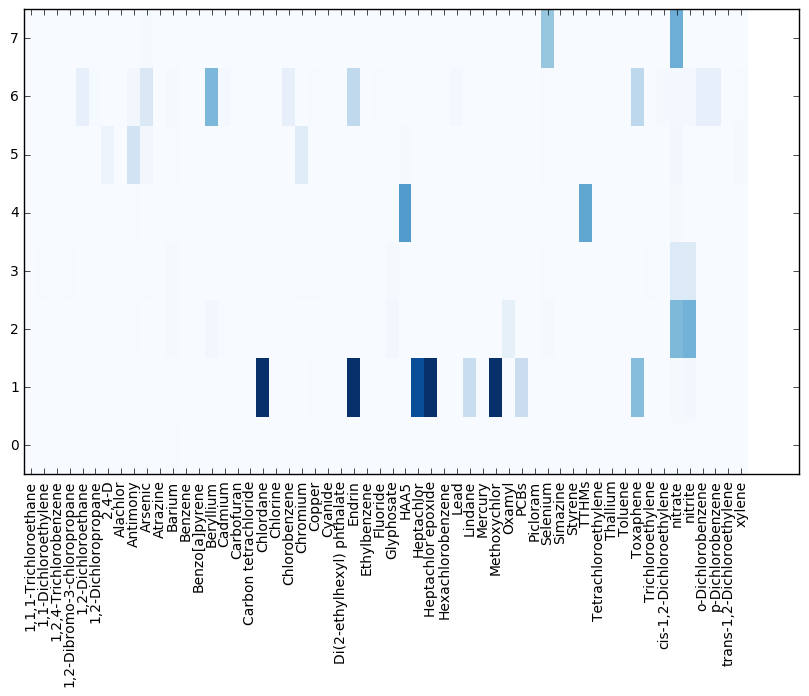

In [81]:
# plt.imshow(centers, interpolation='nearest')
plt.figure(figsize=(10,6))
plt.pcolor(centers, cmap='Blues')
yticks = plt.yticks(np.arange(0.5, len(centers.index), 1), centers.index)
xticks = plt.xticks(np.arange(0.5, len(centers.columns), 1), centers.columns, rotation='vertical')

In [ ]:
normalized['Cluster'] = clusters
normalized.head(5)

In [59]:
stations = data[['Location', 'CountyName', 'LatitudeMeasure', 'LongitudeMeasure']] \
            .drop_duplicates() \
            .set_index('Location')

In [60]:
joined = normalized.join(stations)

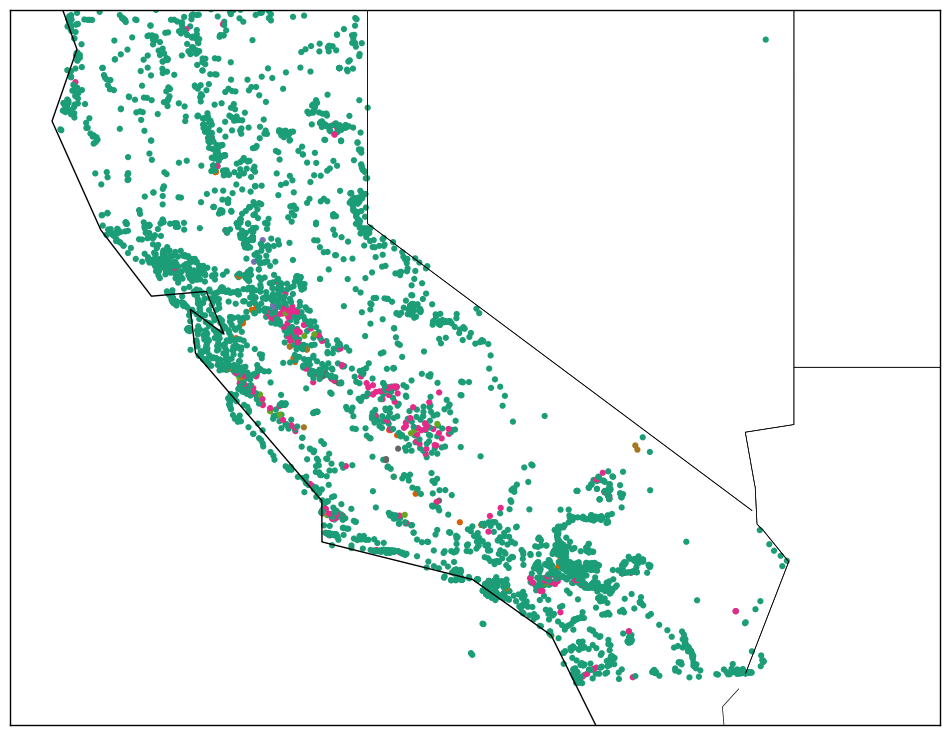

In [61]:
fig = plt.figure(figsize=(12,12))
m=Basemap(llcrnrlat=32, llcrnrlon=-125,urcrnrlat=42, urcrnrlon=-112)
m.drawcoastlines()
m.drawstates()

x, y = m(joined.LongitudeMeasure.values, joined.LatitudeMeasure.values)
m.scatter(x, y, c=joined.Cluster, lw=0.0, cmap='Dark2')